In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

import seaborn as sns
sns.set()
import torch.nn as nn
import torch
import torch.nn.functional as F
import torch.optim as optim

In [3]:
df = pd.read_csv('housing-data.csv')

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


<Axes: xlabel='RM'>

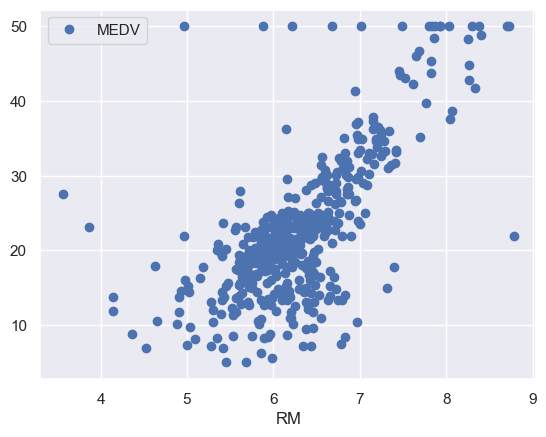

In [6]:
df.plot(x="RM",y="MEDV",style="o")

In [34]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [35]:
df= df.dropna()

In [36]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [37]:
y=df["MEDV"]
x=df.drop("MEDV",axis=1)

In [38]:
sscaler = StandardScaler()
sscaler.fit(x)
X_std= sscaler.transform(x)

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.3,random_state=99)
X_train.shape

(275, 13)

In [40]:
class NN(nn.Module):
  def __init__(self):
    super(NN,self).__init__()
    self.layer1=nn.Linear(X_train.shape[1],39)
    self.layer2=nn.Linear(39,26)
    self.layer3=nn.Linear(26,13)
    self.layer4=nn.Linear(13,1)
  def forward(self,x):
    x=F.leaky_relu(self.layer1(x))
    x=F.leaky_relu(self.layer2(x))
    x=F.leaky_relu(self.layer3(x))
    x=self.layer4(x)
    return x
model = NN()
print(model)

NN(
  (layer1): Linear(in_features=13, out_features=39, bias=True)
  (layer2): Linear(in_features=39, out_features=26, bias=True)
  (layer3): Linear(in_features=26, out_features=13, bias=True)
  (layer4): Linear(in_features=13, out_features=1, bias=True)
)


In [41]:
x=torch.tensor(np.array(X_train),dtype=torch.float32,requires_grad=True)
y=torch.tensor(np.array(y_train).reshape(-1,1),dtype=torch.float32)
x

tensor([[-0.3423, -0.4791,  1.5782,  ...,  1.2305,  0.4307,  0.7797],
        [-0.3174, -0.4791, -0.4146,  ...,  1.1381,  0.3303,  0.0042],
        [-0.3957,  0.3987, -0.7770,  ..., -0.8030,  0.4307, -1.0260],
        ...,
        [-0.3458, -0.4791, -0.6958,  ..., -0.5257,  0.3541, -1.1014],
        [-0.3876, -0.4791, -0.5929,  ..., -0.2947,  0.3019, -1.0863],
        [-0.2629, -0.4791,  1.2434,  ..., -1.7736, -0.2195, -0.9959]],
       requires_grad=True)

In [42]:
optimizer= optim.SGD(model.parameters(),lr=0.003)

In [43]:
loss_fn=nn.MSELoss()

In [44]:
epochs=200
for i in range(epochs):
  #initialize the model parameter
  optimizer.zero_grad(set_to_none=True)
  #calculate the loss
  output=model(x)
  loss=loss_fn(output,y)
  #backpropagation
  loss.backward()
  #update the parameters
  optimizer.step()
  if(i%5==0):
    print(f"epochs: {i}......loss:{loss}")

epochs: 0......loss:566.841552734375
epochs: 5......loss:532.4231567382812
epochs: 10......loss:482.7979431152344
epochs: 15......loss:173.037109375
epochs: 20......loss:25.405860900878906
epochs: 25......loss:35.90828323364258
epochs: 30......loss:55.847251892089844
epochs: 35......loss:32.47157669067383
epochs: 40......loss:48.86634826660156
epochs: 45......loss:29.620412826538086
epochs: 50......loss:43.13420486450195
epochs: 55......loss:27.393125534057617
epochs: 60......loss:38.65605926513672
epochs: 65......loss:25.526147842407227
epochs: 70......loss:35.1974983215332
epochs: 75......loss:23.865684509277344
epochs: 80......loss:32.16636276245117
epochs: 85......loss:22.508228302001953
epochs: 90......loss:29.64480209350586
epochs: 95......loss:21.206029891967773
epochs: 100......loss:27.424072265625
epochs: 105......loss:20.09902572631836
epochs: 110......loss:25.438636779785156
epochs: 115......loss:18.969547271728516
epochs: 120......loss:23.577604293823242
epochs: 125......lo

In [45]:
y_train_pred = model(torch.tensor(X_train,dtype=torch.float32,requires_grad=True))
y_test_pred = model(torch.tensor(X_test,dtype=torch.float32))

#convert to numpy array
y_train_pred = y_train_pred.detach().numpy()
y_test_pred = y_test_pred.detach().numpy()

In [46]:
test_accuracy=r2_score(y_test,y_test_pred)
train_accuracy=r2_score(y_train,y_train_pred)
print(train_accuracy)
print(test_accuracy)

0.804497503967283
0.8518668980857491
